# T4: Taller 4. Taller contrastes de números aleatorios
* Jhonathan Mejia-160003525.


* Tomando como base éste Notebook, implementar los contrastes o pruebas de Kolmogorov-Smirnov, $\chi^2$, pares consecutivos no solapados y rachas (opcional: contraste o prueba de permutaciones y de huecos) en la sección correspondiente para evaluar la calidad de cualquier secuencia de números obtenidas por un generador de números aleatorios $U(0,1)$ utilizando tanto el generador de numpy como el implementado por Ud previamente.
* Evaluar la calidad de los siguientes generadores de números aleatorios usando las pruebas implementadas en el punto anterior:
    * RANDU $x_{i+1}=65539 x_i \mod 2^{31}$
    * Sinclair ZX81 $x_{i+1}=75 x_i \mod (2^{16}+1)$
    * Numerical reciepes $x_{i+1}= 1664525 x_i + 1013904223 \mod 2^{32}$
    * Borland C/C++ $x_{i+1}= 22695477 x_i + 1 \mod 2^{32}$

In [76]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import time

# Generadores de números aleatorios

In [1]:
def randu(n):
    xList = [] #arreglo con los numeros generados
    m = 2**31
    lastXn = int(time.perf_counter())+65539
    print(time.perf_counter())
    for i in range(n):
        Xn = float((65539*lastXn)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
    return xList

def sinclair(n):
    
    xList = [] #arreglo con los numeros generados
    m = 2**16+1
    lastXn = int(time.perf_counter())+65539
    for i in range(n):
        Xn = float((75*lastXn)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
        #print random
    #print xList
    return xList

def numericalRecipes(n):
    
    xList = [] #arreglo con los numeros generados
    m = 2**32
    lastXn = int(time.perf_counter())+65539
    for i in range(n):
        Xn = float((1664525*lastXn+1013904223)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
        #print random
    #print xList
    return xList

def borland(n):
    
    xList = [] #arreglo con los numeros generados
    m = 2**32
    lastXn = int(time.perf_counter())+65539
    print (lastXn)
    for i in range(n):
        Xn = float((22695477*lastXn+1)% m)
        lastXn = Xn
        random = float(Xn/m)
        xList.append(random)
        #print random
    #print xList
    return xList
       
def cong_mixto(N):
    Xn = time.time()
    xList = []
    a = 25214903917
    m = (2**48)-1
    for _ in range(0,N):
        Xn = (a*Xn + 1) % m
        Un = Xn/m
        xList.append(Un)
        
    return xList

def numerosAleatorios(size):
    result = np.zeros(size)
    for i in range(size):
        result[i] = random.random()
    return result
    

def numpyRandom(x):   
    return np.random.uniform(0, 1,x)
    


### Constraste o prueba de Kolmogorov-Smirnov

Consideramos el caso en que $F_0$ es continua. La función de distribución empírica de una muestra $X_1, X_2,...,X_n$ se define como:

$$F_n(x)=\frac{\#\{X_{i}\leq x\}}{n}$$

Bajo la hipótesis nula $H_0:F_X(x)=F_0(x)$, esperamos que $F_n$ se aproxime a $F_0$. Definimos el estadístico bilateral de Kolmogorov-Smirnov

$$D_{n}=\underset{x\in\mathbb{R}}{\sup}\left|F_{n}(x)-F_{0}(x)\right|$$

La distribución exacta de $D_n$ está tabulada para valores seleccionados de $n\leq40$ y del nivel de significación $\alpha$. Para muestras grandes, se utiliza la distribución asintótica de $D_n$, que viene dada, para todo $z\leq0$, por

$$\underset{n\rightarrow\infty}{\lim}P(\sqrt{n}D_{n}\leq z)=L(z)=1-2\overset{\infty}{\underset{i=1}{\sum}}(-1)^{i-1}e^{-2i^{2}z^{2}}$$

$L(z)$ está tabulada y se comprueba que la aproximación es suficientemente buena para $n\geq35$. Intuitivamente, esperamos que $D_n$ sea pequeño cuando la hipótesis nula es cierta.
En nuestro caso particula de aleatoriedad, si $X_{(1)}<X_{(2)}<...<X_{(n)}$ designa al estadístico de orden, $F_0(x_{(i)})=x_{(i)}$, y como $F_n(x_{(i)})=i/n$, resulta:

$$D_{n}=\underset{i\leq i\leq n}{\max}\left\{ \max\left[\left|\frac{i}{n}-x_{(i)}\right|,\left|x_{(i)}-\frac{i-1}{n}\right|\right]\right\}$$



<center><img src="https://bitbucket.org/aacruzr/unillanos-notebooks/raw/afc11c0ebe3579af514229d8ee351646dea883bb/simulacion/notebooks/imgs/300px-KS_Example.png" width="30%" height="30%" ></center>
<center>Figura. Ilustración del estadístico de Kolmogorov–Smirnov (K–S). La línea roja es una función de distribución acumulada (cumulative distribution function, CDF), la línea azul es una función empirica de distribución acumulada (empirical cumulative distribution function, ECDF), y la línea negra es el estadístico K–S. Imagen tomada de Wikipedia [https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test]</center>


## Codigo Kolmogorov


In [84]:
def kolmogorov():
    
    #Generador de numeros aleatorios
    
    print('Escoja el generador a probar: ')
    print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++\n5.-Generador Aleatorio\n6.-Generador Numpy")
    seleccion = input("Opcion: ")
    generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland, '5': numerosAleatorios,'6':numpyRandom}
    n = int(input("Inserte la cantidad de numeros a generar n: "))
    x = generadores[seleccion](n)
    # Teoretical CDF for Uniform distribution F(x)
    u = [1.0] * n
    
    # Graficar distribucion empirirca f(x)
    count, bins, ignored = plt.hist(x, 10, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=3, color = '#FA58F4')
    plt.show()
    # Generamos la distribucion acumulada de una distribucion uniforme con parametros 0 y 1, para n valores.
    x1 = np.arange(1/(n+0.0),1+1/(n+0.0),1/(n+0.0))
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))
    #Generamos distribucion acumulada del generador que estamos evaluando para N valores.
    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    print("De = ",np.max(De))
    
    # Plotting
    plt.plot(x1,y1,label='Uniforme')
    plt.step(x2,y2,label='Aleatoria')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='De')
    
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Probabilidad acumulada P(X)')
    Da = (1.36/(n**0.5)+0.0)
    if np.max(De)< Da:
        print ('El generador probado es UNIFORME, hipotesis aceptada, De: ',np.max(De),' menor que Da: ',Da)
    else:
        print ('Hipotesis rechazada, generador NO UNIFORME. Da: ',Da)
    print ('Nivel de significacion a: ',(0.05))
        
    




## Test Kolmogorov

Escoja el generador a probar: 
Opciones
1.- RANDU
2.- Sinclair ZX81
3.- Numerical Recipes
4.-Borland C/C++
5.-Generador Aleatorio
6.-Generador Numpy
Opcion: 6
Inserte la cantidad de numeros a generar n: 10


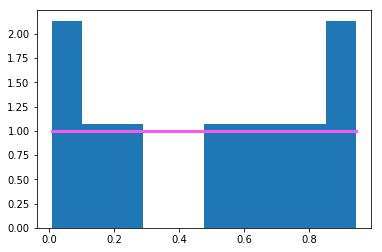

De =  0.3046934790572348
El generador probado es UNIFORME, hipotesis aceptada, De:  0.3046934790572348  menor que Da:  0.4300697617828996
Nivel de significacion a:  0.05


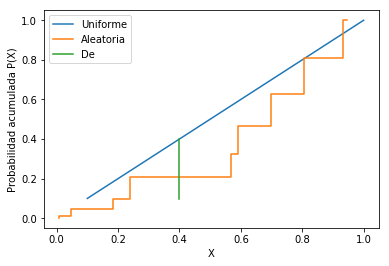

In [85]:
kolmogorov()

### Contraste o prueba  $\chi^{2}$

La prueba $\chi^{2}$ es de bondad de ajuste. Es poco potente, por lo que permite justificar el rechazo de una hipótesis, pero proporciona escaso soporte a su aceptación. El problema de bondad de ajuste se plantea como sigue. Tenemos una muestra $X_1, X_2,...,X_n$ de una población con distribución $F_X(x)$ desconocida. Deseamos contrastar la hipótesis nula $H_0:F_X(x)=F_0(x)$, para todo $x\in\mathbb{R}$, donde $F_0(x)$ está completamente especificada, frente a la alternativa $H_1:F_X(x) \neq F_0(x)$ para algún $x$.
Para realizar el contraste, partimos el soporte de $X$ en $k$ subconjuntos o clases mutuamente excluyentes. Para cada subconjunto $i$, $i=1,...,k$, calculamos el número $f_i$ de observaciones que caen en la clase y el numero esperado de observaciones $e_i$ bajo la distribución hipotética $F_0$. El estadístico de la prueba es:

$$\chi^{2}=\overset{k}{\underset{i=1}{\sum}}\frac{(f_{i}-e_{i})^{2}}{e_{i}}$$

cuya distribución asintótica es una $\chi_{k-r-1}^{2}$, donde $r$ es el número de parámetros que se estiman a partir de las observaciones. La aproximación se considera aceptada si $\min\left\{ e_{i}>5\right\}$. Intuitivamente, el estadístico tiende a ser pequeño bajo la hipótesis nula, y grande cuando ésta es falsa, con lo qu ese deduce inmediatamente un contraste de hipótesis. La potencia del contraste crece con el número $k$ de subconjuntos considerados.

En nuestro problema de aleatoriedad, $F_0$ es la función de distribución de la uniforme en [0,1], con lo que $r=0$. Además, pueden cogerse $k$ subintervalos de [0,1] de igual longitud, con lo que $e_i=n/k$.


In [86]:
def chicuadrado():
    
    print('Escoja el generador a probar: ')
    print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++\n5.-Generador Aleatorio\n6.-Generador Numpy")
    seleccion = input("Opcion: ")
    generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland, '5': numerosAleatorios,'6':numpyRandom}
    n = int(input("Inserte la cantidad de numeros a generar n: "))
    x = generadores[seleccion](n)
    k = 20
    fi, clases, nadaimportante = plt.hist(x, k)
    # fi = observaciones encontradas, ei= observaciones esperadas
    ei = np.ones_like(clases)*(n/k)

    plt.plot(clases, ei, linewidth=3, color = '#FA58F4')
    plt.title('Chi Cuadrado')
    plt.show()
    #print fi,clases  
    chi2 = 0
    ei = n/k
    for i in fi:
        chi2 += (i-ei)**2
    #print chi2
    if chi2<=31.41:
        print ('Hipotesis aceptada. Generador UNIFORME. Estadistico x2: ',chi2)
        print ('Nivel de significacion a: ',(0.05))
    else:
        print ('Hipotesis rechazada. Generador NO UNIFORME. Estadistico x2: ',chi2)


Escoja el generador a probar: 
Opciones
1.- RANDU
2.- Sinclair ZX81
3.- Numerical Recipes
4.-Borland C/C++
5.-Generador Aleatorio
6.-Generador Numpy
Opcion: 5
Inserte la cantidad de numeros a generar n: 100


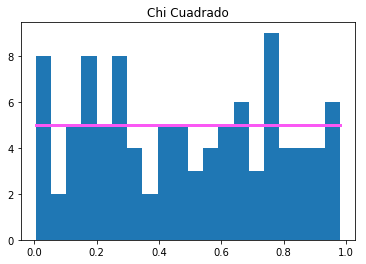

Hipotesis rechazada. Generador NO UNIFORME. Estadistico x2:  76.0


In [87]:
chicuadrado()

# Contraste de pares consecutivos no solapados

Dada la muestra $X_1, X_2,...,X_n$, $n$ par, y un nivel de significancia $\alpha$, el test consiste en los siguientes pasos:
1. Dividir el intervalo $(0, 1)$ en $k$ clases disjuntas de la misma amplitud, $1/k$
2. Categorizamos la muestra $X_1, X_2,...,X_n$ asociando a cada $X_i$ el índice de la clase a la que pertenece. Sea $Y_1, Y_2, …, Y_n$ la muestra discretizada.
3. Agrupamos los valores de la muestra discretizada en pares consecutivos no solapados $(Y_1, Y_2),(Y_3, Y_4),...,(Y_{n-1}, Y_n)$
4. Sea $O_{ij}$ el número de veces que aparece el par $(i,j)$. Si la hipótesis de uniformidad es cierta, entonces $O_{ij}  ~ Bi(n/2, p=(1/k^2))$. Por lo tanto, $E[O_{ij}] = E_{ij} = n/(2k^2)$
5. Se evalúa el estadístico de contraste de Chi-cuadrado con $k^2-1$ grados de libertad. Rechazando la hipótesis si el estadístico es mayor a $\chi^2_{k^2-1, \alpha}$

## Codigo Pares

Escoja el generador a probar: 
Opciones
1.- RANDU
2.- Sinclair ZX81
3.- Numerical Recipes
4.-Borland C/C++
5.-Generador Aleatorio
6.-Generador Numpy
Opcion: 6
Inserte la cantidad de numeros a generar n: 100
T :  50.0


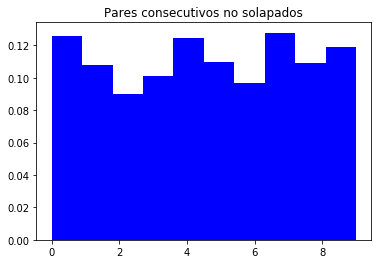

In [88]:
def generarNUmerosYi(k,n,semilla):
    xi = semilla
    numeros = []
    for i in range(n):
        ui,xi = congruencial(xi)
        num = int(ui*k)     
        numeros.append(num)
        
    return numeros


def parejas(num,n):
    
    parejas = []
    n = int(n/2)
    for i in range(n):
        pareja = [num[i*2],num[i*2+1]]
        parejas.append(pareja)
    return parejas

def Oij(parejas,k):
    #n = len(parejas)
    #n = n*2
    n =k
    coni = []
    for i in range(n):
        conj = []
        for j in range(n):            
            cont = 0;
            for k in range(len(parejas)):                
                if([i,j] == parejas[k]):
                      cont=cont+1
            conj.append(cont)
        coni.append(conj)
    return coni
            
def T(oj,k,n):
    Eij = n/(2*(k**2))
    T = 0
    for i in range(k):
        for j in range(k):
            T = ((oij[i][j]-Eij)**2)/(Eij)+T
            
    return T

def mostrar(aleatorios,color):
    n, bins, patches = plt.hist(aleatorios, normed=1, facecolor=color)
    plt.title('Pares consecutivos no solapados')
    plt.show()
    
print('Escoja el generador a probar: ')
print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++\n5.-Generador Aleatorio\n6.-Generador Numpy")
seleccion = input("Opcion: ")
generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland, '5': numerosAleatorios,'6':numpyRandom}
n = int(input("Inserte la cantidad de numeros a generar n: "))
x = generadores[seleccion](n)

#num = generarNUmerosYi(k,n,semilla) #extraemos los npumeros Yi necesarios para nuestra funciómn

parejas = parejas(x,n) # hallamos las parejas 

oij = Oij(parejas,k)

T = T(oij,k,n)
print('T : ',T )

mostrar(num, 'blue')

# Constraste o prueba de rachas

Dada la sucesión de observaciones $X_1, X_2,...,X_n$, construimos la sucesión de simbolos binarios definida mediante 1 si $X_i<X_{i+1}$, 0 si $X_i>X_{i+1}$. Definimos  racha creciente (decreciente) de longitud $l$ a un grupo seguido de $l$ números 1 (ó 0). Contabilizamos el número de rachas. Sabemos que su distribución asintótica, bajo la hipótesis nula de aleatoriedad, es:

$$N\left(\frac{2n-1}{3},\frac{16n-29}{90}\right)$$

Intuitivamente, rechazamos la aleatoriedad con un número muy pequeño o muy grande de rachas. De ahí se obtiene inmediatamente la prueba.

El estadístico de contraste sería:

$$Z=\frac{R-\frac{2n-1}{3}}{\sqrt{\frac{16n-29}{90}}}$$

que sigue una distribución $N(0,1)$.

Para un nivel de significancia $\alpha$, se rechaza la hipótesis de aleatoriedad si $|Z|>Z_{\alpha/2}$

## Codigo rachas

In [89]:
def rachas():
    
    print('Escoja el generador a probar: ')
    print("Opciones\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.-Borland C/C++\n5.-Generador Aleatorio\n6.-Generador Numpy")
    seleccion = input("Opcion: ")
    generadores = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland, '5': numerosAleatorios,'6':numpyRandom}
    n = int(input("Inserte la cantidad de numeros a generar n: "))
    x = generadores[seleccion](n)
    
    #Test de rachas
    creciente = True
    rachasCrecientes = 0
    rachasDecrecientes = 0
    #x = [1,2,5,3,4,6,2,1,10,11,9,8,7,6] Distribucion de prueba
    for i in range(len(x)):
        if(i == 0):
            if(x[i]<x[i+1]):
                creciente = True
                rachasCrecientes += 1
            else:
                creciente = False
                rachasDecrecientes += 1
        else:
            if(creciente == True):
                if(x[i]<x[i-1]):
                    rachasDecrecientes += 1
                    creciente = False
            else:
                if(x[i]>x[i-1]):
                    rachasCrecientes += 1
                    creciente = True
    # R numero de rachas
    R = rachasCrecientes + rachasDecrecientes
    print ('Rachas Crecientes: ',rachasCrecientes)
    print ('Rachas Decrecientes: ',rachasDecrecientes)
    print ('Total de Rachas R: ',R)
    
    #Z estadistico de contraste
    Z = (R-(2*n-1)/3)/((16*n-29)/90)**0.5
    #print Z
    print ('Nivel de confianza a: ',(0.05))
    n, bins, patches = plt.hist(x, normed=1, facecolor='blue')
    plt.show()
    if(abs(Z) < 0.50978):
        print ('El generador probado es ALEATORIO. Hipotesis aceptada. Z: ',Z)
    else:
        print ('El generador probado es NO ALEATORIO. Hipotesis rechazada. Z: ',Z)
                    


## Test Rachas

Escoja el generador a probar: 
Opciones
1.- RANDU
2.- Sinclair ZX81
3.- Numerical Recipes
4.-Borland C/C++
5.-Generador Aleatorio
6.-Generador Numpy
Opcion: 4
Inserte la cantidad de numeros a generar n: 10
70804
Rachas Crecientes:  3
Rachas Decrecientes:  3
Total de Rachas R:  6
Nivel de confianza a:  0.05


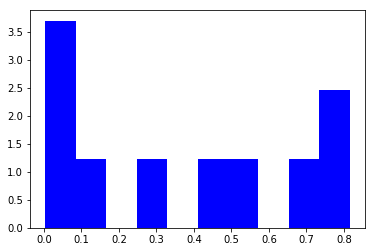

El generador probado es ALEATORIO. Hipotesis aceptada. Z:  -0.27628948199776854


In [90]:
rachas()

# Referencias

[Ríos, Ríos & Martín, 2000] David Ríos, Sixto Ríos, Jacinto Martín. Simulación, Métodos y aplicaciones. Editorial Alfaomega, 2000.